In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
train = pd.read_csv('./boss/all_android.csv')

In [17]:
train.describe()

,company,education,experience,location,position,salary
count,1650,1650,1650,1650,1650,1650
unique,1108,6,7,5,690,149
top,今日头条,本科,3-5年,北京,Android开发工程师,10k-20k
freq,19,994,671,330,188,163


In [18]:
train.head()

,company,education,experience,location,position,salary
0,火豹科技,大专,1-3年,广州,安卓开发工程师,6k-10k
1,PPmoney万惠,本科,1-3年,广州,Android工程师,12k-18k
2,广州诺特软件开发...,本科,3-5年,广州,高级Android开发工程师,8k-13k
3,美至简,本科,1-3年,广州,Android研发工程师,10k-16k
4,百得思维,本科,3-5年,广州,Android,10k-12k


In [22]:
train = train[train['position'].str.contains('Android|安卓',regex=True)]
train = train[~train['education'].str.contains('大专',regex=True)]
train.shape # 共计488条数据

(488, 6)

#### 哪些公司在招聘

In [24]:
train['company'].value_counts().head(10)

今日头条    7
平安好房    6
纬创      5
三才科技    4
潮流网络    4
软通动力    4
网易      4
六律科技    4
泛微软件    4
讯一佳     4
Name: company, dtype: int64

In [25]:
# 教育要求
train['education'].value_counts()

本科    449
不限     35
硕士      4
Name: education, dtype: int64

In [26]:
train['experience'].value_counts()

3-5年     218
1-3年     181
5-10年     35
不限        33
1年以内      14
应届生        7
Name: experience, dtype: int64

In [27]:
train['location'].value_counts()

北京    118
上海    107
杭州    100
深圳     82
广州     81
Name: location, dtype: int64

In [36]:
train['position'].value_counts().head()

Android开发工程师    115
Android          86
安卓开发工程师          37
Android工程师       32
安卓工程师            16
Name: position, dtype: int64

In [28]:
salary_s = []
for salary in train['salary']:
    l = salary.split('-')
    first = int(l[0][:-1])
    second = int(l[1][:-1])
    salary_s.append(round(first + (second - first) / 4))
train['salary_simple'] = salary_s

In [29]:
salary = train['salary_simple'].value_counts()
salary.head(10)

12    71
11    54
10    46
18    43
14    43
19    36
9     30
8     27
25    16
22    15
Name: salary_simple, dtype: int64

In [30]:
train = train[train['salary_simple'] < 50]

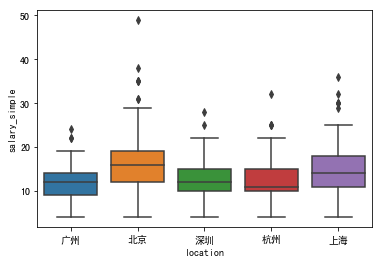

In [32]:
# 相互关系
sns.boxplot(x="location", y="salary_simple", data=train)

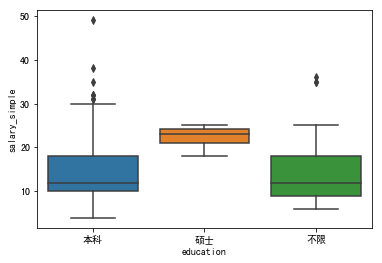

In [33]:
sns.boxplot(x="education", y="salary_simple", data=train)

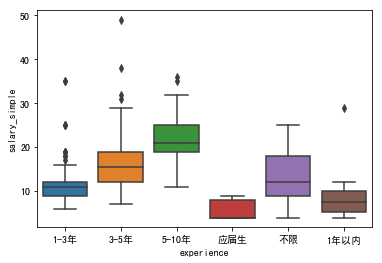

In [34]:
sns.boxplot(x="experience", y="salary_simple", data=train)

In [45]:
train[train['experience'] == '1-3年']['salary_simple'].mean()

11.359116022099448

In [47]:
train[train['salary_simple'] > 30]

,company,education,experience,location,position,salary,salary_simple
255,北京京东科技,不限,5-10年,北京,Android高级工程师,30k-50k,35
263,借贷宝,本科,3-5年,北京,Android,30k-60k,38
305,璧晟科技,本科,5-10年,北京,BeTime - Android开发工程师,25k-50k,31
359,爱奇艺,本科,1-3年,北京,Android多媒体高级工程师,30k-50k,35
415,北京格物,不限,1-3年,北京,Android高级开发工程师,30k-50k,35
428,OKCoin,本科,3-5年,北京,资深Android开发工程师／TL,40k-75k,49
436,今日头条,本科,3-5年,北京,资深Android开发工程师,25k-50k,31
1063,运满满,不限,5-10年,上海,Android技术专家,30k-55k,36
1202,今日头条,本科,3-5年,上海,Android工程师（上海）,26k-50k,32
1474,阿里巴巴菜鸟,本科,5-10年,杭州,Android ROM系统专家,30k-40k,32
